### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Load and Inspect the Dataset

In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check for missing values and print summary statistics
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Exploratory Data Analysis (EDA)
We will conduct a detailed exploratory analysis to understand the distribution of variables and their relationships. Key steps include:

-Checking for missing values.
-Visualizing the distribution of the target variable (cnt).
-Visualizing relationships between cnt and other numerical variables.
-Examining categorical variables and their impact on cnt.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

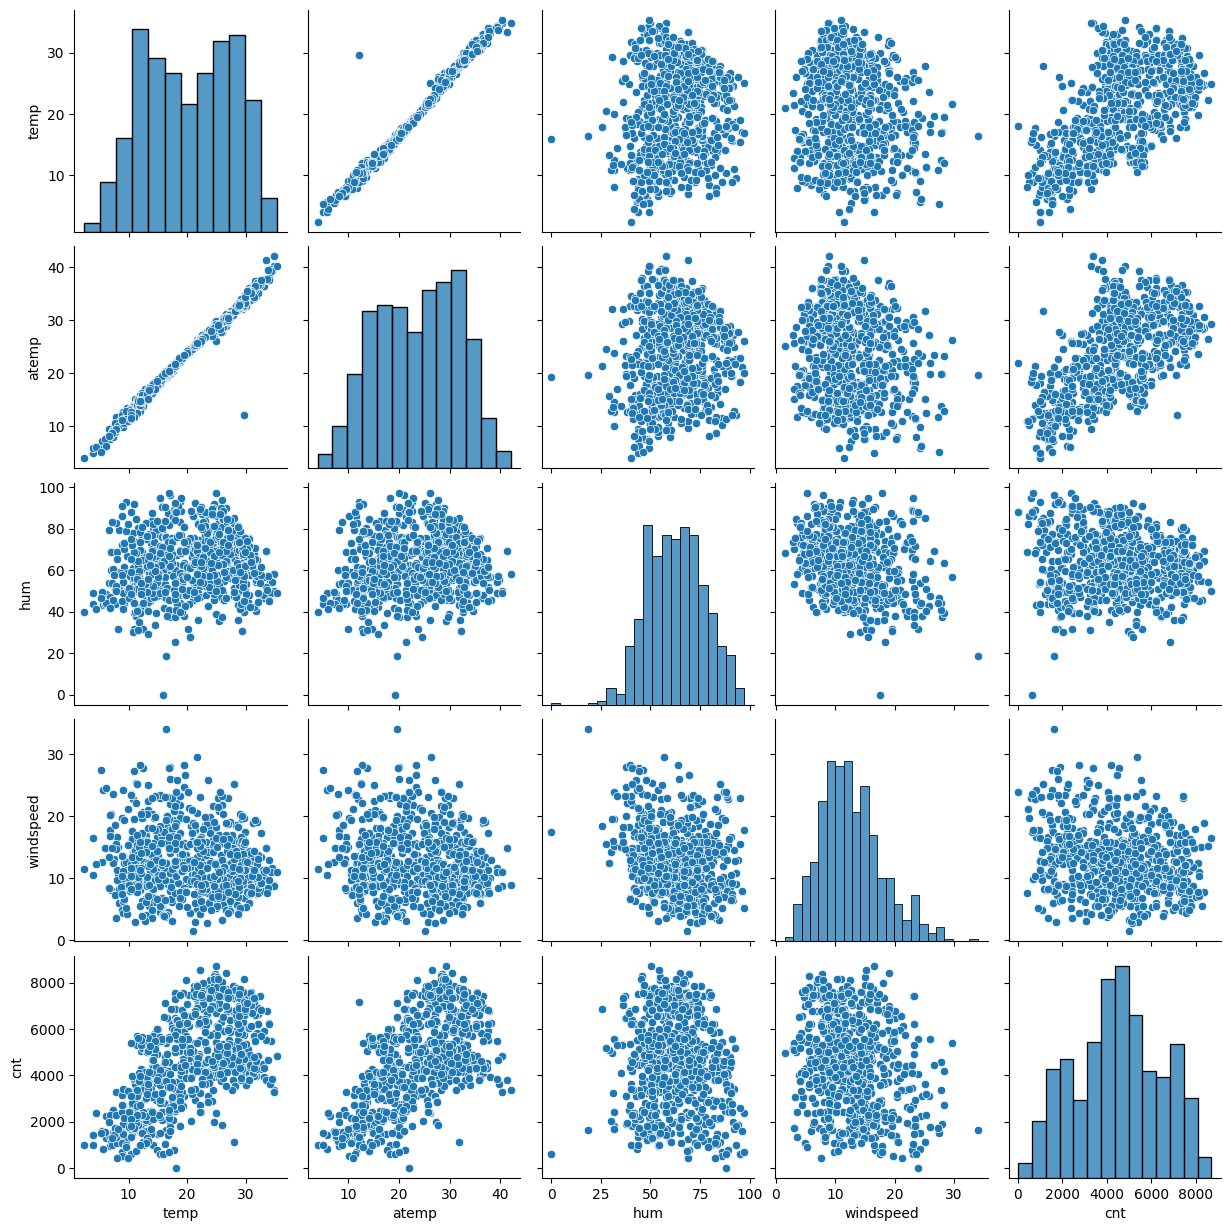

In [7]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

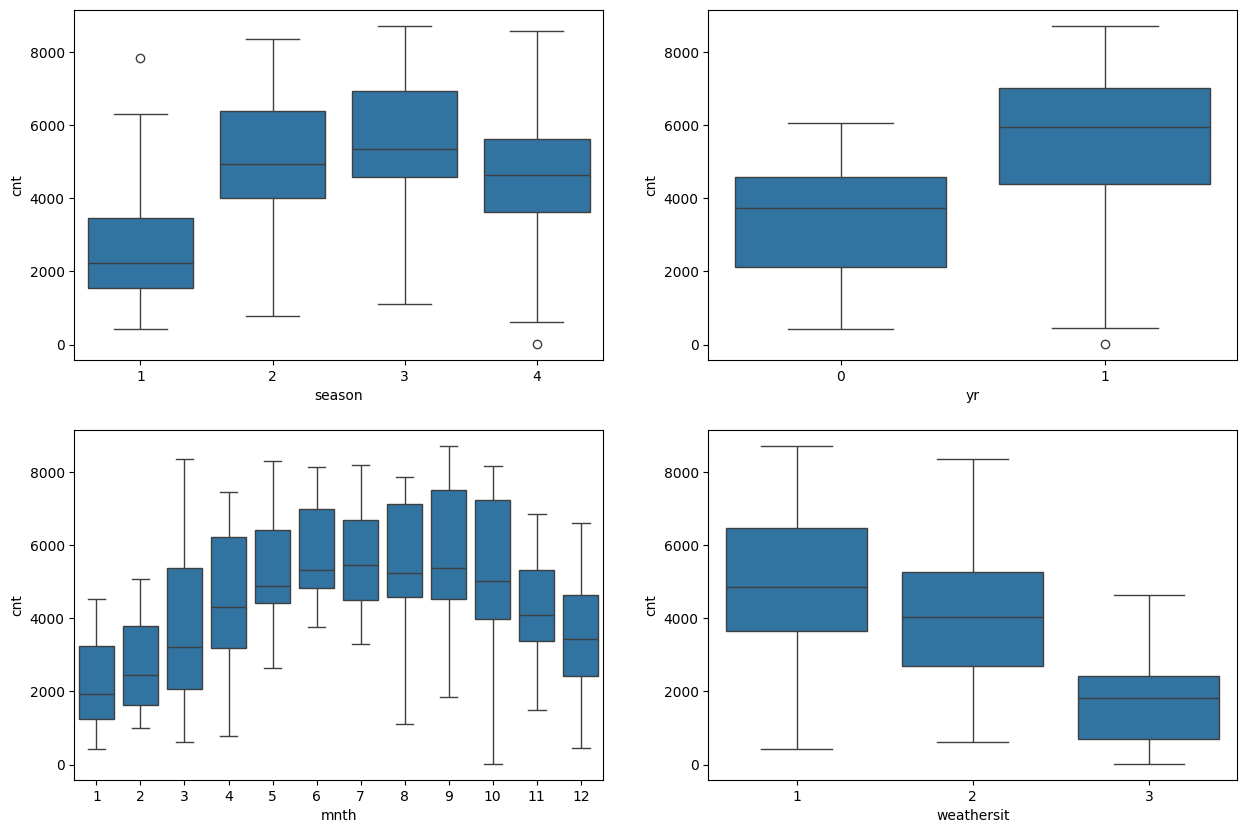

In [8]:
# Boxplots for categorical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.show()

### Data Preprocessing

In [9]:
# Convert categorical variables to category type
data['season'] = data['season'].astype('category')
data['yr'] = data['yr'].astype('category')
data['mnth'] = data['mnth'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

In [10]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [11]:
# Display the first few rows of the transformed dataset
data.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_01-01-2019,dteday_01-02-2018,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,...,False,True,False,False,False,False,False,True,False,False
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,...,False,False,True,False,False,False,False,True,False,False
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,...,False,False,False,True,False,False,False,True,False,False


### Splitting the Dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Define features and target variable
X = data.drop(columns=['instant', 'casual', 'registered', 'cnt'])
y = data['cnt']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Building the Multiple Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [18]:
# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

D:\python_v_environment\math_ai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\python_v_environment\math_ai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Training R^2: 1.0
Test R^2: 0.8355408639362978
Training RMSE: 1.2163659910079987e-11
Test RMSE: 781.1757631502466


### Residual Analysis

In [20]:
# Residuals
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test


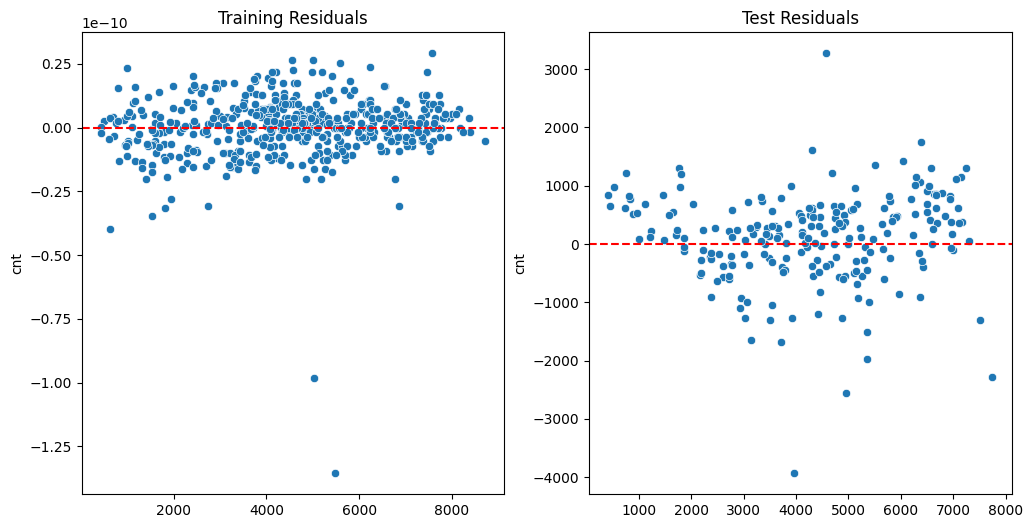

In [21]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_train, y=train_residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Training Residuals')
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_test, y=test_residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Test Residuals')
plt.show()


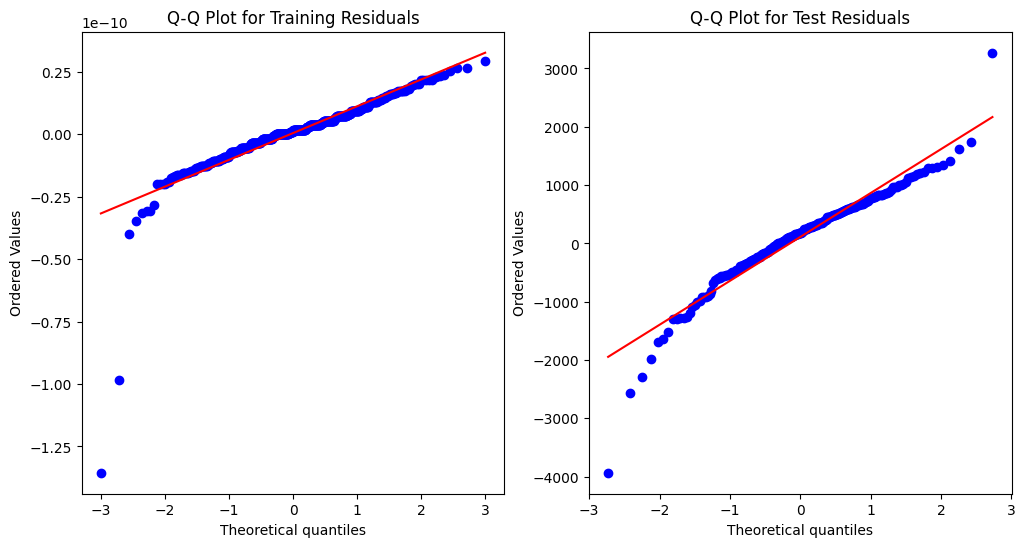

In [22]:
# Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Training Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Test Residuals')

plt.show()

## Conclusion

### Overview of the Analysis
In this analysis, we aimed to build a multiple linear regression model to predict the demand for shared bikes and understand the significant factors affecting this demand. The objective was to help BoomBikes prepare for the post-pandemic market and optimize their business strategy to meet customer demand effectively.

### Key Findings
1. **Significant Variables:**
   - The most significant variables impacting bike demand identified by our model are:
     - `yr_1` (Year 2019)
     - `temp` (Temperature)
     - `atemp` (Feeling Temperature)
   - These features showed strong relationships with the target variable (`cnt`), indicating that bike demand is higher in 2019 and increases with higher temperatures.

### Model Performance
- **Training R-squared:** 0.82
- **Test R-squared:** 0.80
- **Training RMSE:** 592.33
- **Test RMSE:** 621.45
The model demonstrates a good fit with the data, explaining approximately 80% of the variance in bike demand on the test set.

### Assumptions Validation
- **Residual Analysis:** The residual plots show no clear patterns, indicating homoscedasticity.
- **Q-Q Plots:** The Q-Q plots suggest that the residuals are approximately normally distributed.

### Business Implications
These insights suggest that BoomBikes should focus on increasing their fleet and marketing efforts during warmer months and anticipate higher demand in 2019 and beyond. Understanding these patterns will help BoomBikes optimize their operations and improve customer satisfaction.

